# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [ ]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink'),
  Text(5, 0, 'Steak Bowl')])

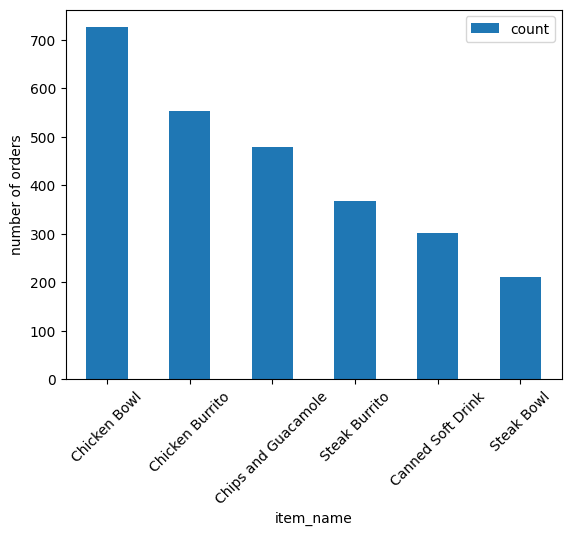

In [ ]:
top_five = chipo['item_name'].value_counts().reset_index()[0:6]
top_five.plot(kind='bar', x='item_name')
plt.ylabel('number of orders')
plt.xticks(rotation=45)

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [ ]:
chipo["item_price_float"]=pd.Series()
for i in range(len(chipo)):
  chipo.item_price_float[i] = chipo.item_price[i][1:]
chipo.item_price_float=chipo.item_price_float.astype(float)

Streaming output truncated to the last 5000 lines.
<ipython-input-140-4b1349b15499>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chipo.item_price_float[i] = chipo.item_price[i][1:]
<ipython-input-140-4b1349b15499>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chipo.item_price_float[i] = chipo.item_price[i][1:]
<ipython-input-140-4b1349b15499>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chipo.item_price_float[i] = chipo.item

Text(0, 0.5, 'Quantity per order')

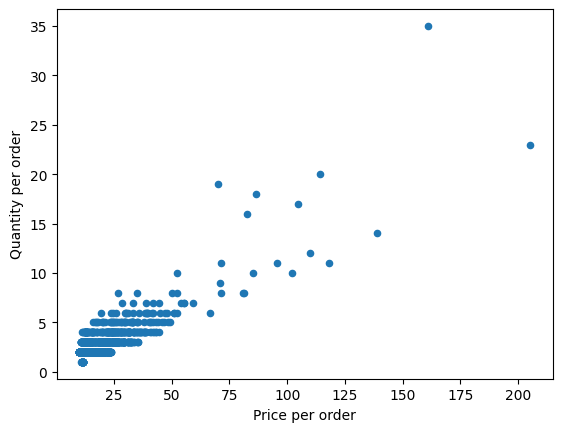

In [ ]:
chipo_orders = chipo.groupby('order_id').sum()

chipo_orders.plot(x='item_price_float', y='quantity', kind='scatter')
plt.xlabel('Price per order')
plt.ylabel('Quantity per order')

### Step 7. BONUS: Create a question and a graph to answer your own question.

가로축엔 가격이, 세로축엔 해당 가격인 item이 주문된 총 횟수가 오도록하는 scatter 그래프를 그려라.

Text(0, 0.5, 'Order quantity of the price')

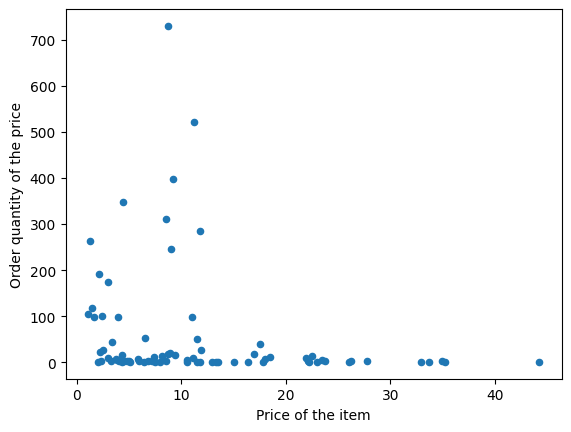

In [ ]:
chipo_price = chipo.groupby('item_price_float').count().reset_index()
chipo_price.plot(x='item_price_float', y='quantity', kind='scatter')
plt.xlabel('Price of the item')
plt.ylabel('Order quantity of the price')